<a href="https://colab.research.google.com/github/BautistaDavid/Datos_Prueba/blob/main/prueba_corredores_davivienda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis Exploratorio de datos**

En este notebook se presentara una descripción, análisis y visualización de los datos de la tabla ```Students Performance```, la cual contiene información sobre el desempeño de estudiantes en Estados Unidos en diferentes materias, asi mismo background de los padres. 

A continuación se presentaran y desarrollaran diferentes secciones en las cuales se comentara el código usado y así mismo análisis y conclusiones sobre cada uno de los ítems presentados.




##  **Carga de librerías**

In [1]:
# Librerias Manejo de datos
import pandas as pd
  
# Librerias Visualización de datos
import seaborn as sns 
import matplotlib.pyplot as plt 


import warnings
warnings.filterwarnings('ignore')

## **Carga y exploración incial de datos**

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/BautistaDavid/Datos_Prueba/main/StudentsPerformance.csv') # Carga de los datos

In [3]:
df.head() # visualización 5 primeras observaciones

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# Creamos una función que de infromación General sobre la tabla 

def informacion_tabla(tabla:pd.DataFrame):
  print("\033[1m" + 'Información General de la Tabla\n ' + "\033[0m")
  print(f'Numero de Observaciones = {df.shape[0]}')
  print(f'Numero de Columnas = {df.shape[1]}')


In [5]:
informacion_tabla(df)

Información General de la Tabla
 
Numero de Observaciones = 1000
Numero de Columnas = 8


### **Exploración Columnas (Tipos de datos)**

In [6]:
print("\033[1m" + 'Tipo de datos Columnas\n ' + "\033[0m")
df.dtypes

Tipo de datos Columnas
 


gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

**Valores unicos en variables categoricas**

In [7]:
print("\033[1m" + 'Valores Unicos Variables Categorias\n ' + "\033[0m")

for columna in df.select_dtypes(exclude='int').columns:
  print("\033[1m" + columna + "\033[0m")
  print(df[columna].unique(),'\n')

Valores Unicos Variables Categorias
 
gender
['female' 'male'] 

race/ethnicity
['group B' 'group C' 'group A' 'group D' 'group E'] 

parental level of education
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 

lunch
['standard' 'free/reduced'] 

test preparation course
['none' 'completed'] 



**Transformación Tipos de Datos**

In [8]:
for columna in df.select_dtypes(exclude='int').columns:
  df[columna] = df[columna].astype('category')

Esta primera sección nos permite conocer las dimensiones de la tabla que se trabajara (1000 observaciones x 8 Columnas) . Así mismo se logra identificar que la tabla cuenta con 3 variables numéricas, las cuales hacen referencia a los puntajes de los estudiantes en las áreas de matemáticas, Escritura y lectura. 

Por otro lado también se puede comentar que la tabla cuenta con 5 varaibles ‘object’, la cuales posteriormente fueron transformadas a tipo “category”, puesto que son simplemente variables que están expresando determinadas categorías tales como, genero, Raza/etnia, Nivel educativo de los padres, preparación previa para el test. 

### **Estadisticas descriptivas Variables**

**Variables Numericas**

In [10]:
df.select_dtypes(include='int').describe().round(2)

,math score,reading score,writing score
count,1000.00,1000.00,1000.00
mean,66.09,69.17,68.05
std,15.16,14.60,15.20
min,0.00,17.00,10.00
25%,57.00,59.00,57.75
50%,66.00,70.00,69.00
75%,77.00,79.00,79.00
max,100.00,100.00,100.00


**Variables Categoricas**

In [11]:
df.select_dtypes(include='category').describe()

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


En esta sección se puede explorar las estadísticas descriptivas básicas tanto de las variables numéricas como de las categóricas, de manera que se pueden concluir diferentes aspectos teniendo en cuenta el tipo de variable:


**Variables Numéricas**:

* Nótese que el puntaje promedio mas alto de los estudiantes es en el Área de escritura con 69.17 puntos, 1.12 mas que en escritura y 3.08 más que en matemáticas, a priori se podría pensar que la escuelas deberían tener en cuenta posibles aspectos para mejorar los puntajes en las áreas más bajas, aun así, es interesante que la diferencia por lo menos en promedio entre las áreas no es realmente alta.

* Las desviaciones estándar de los resultados por prueba nos dan cierto indicio de un nivel estándar alto de rendimiento en los estudiantes, nótese que para el área de escritura la desviación es apenas de 15.20 puntos, lo que quiere decir que en promedio los puntos de los estudiantes se alejan de la media en esa cantidad de unidades, lo cual es apenas un 15% del máximo de puntos que se pueden lograr por prueba.


**Variables Categóricas**:


*	Se puede comentar el hecho de que las mujeres cuentan con más participación que los hombres dentro del total de los estudiantes en la tabla de datos, para el caso de las etnias es el grupo c el que se lleva la mayoría de los registros. Así mismo la mayoría de los padres de los estudiantes realizaron alguna educación superior. Todos estos datos son importantes de recalcar para entender como está compuesta la muestra y así mismo como se puede caracterizar a los individuos de la misma. 


## **Visualización de Datos**


Para esta sección nos centraremos en tratar de responder ciertas preguntas por medio de la visualización de los datos, esto con el fin de desarrollar un mejor análisis y entendimiento de la tabla.


**¿Como están caracterizados los estudiantes?**

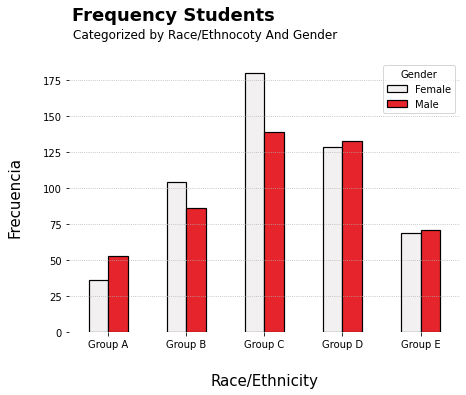

In [12]:
df_ = df[['race/ethnicity','gender']]
df_['conteo'] = 1

fig,ax = plt.subplots(figsize=(7,5))

plt.suptitle(f'Frequency Students',fontsize=18,x=0.13,y=1.03,ha='left',weight='bold')  # Suptitulo
plt.title(f'Categorized by Race/Ethnocoty And Gender',fontsize=12,ha='left',x=0.01,y=1.06) # Titulo  

df_.pivot_table(index='race/ethnicity',columns = 'gender',aggfunc='count').plot(kind='bar',ax=ax,color=['#f2f0f0','#e5252b',],edgecolor='black',linewidth=1.2)
plt.xticks(ticks=[0,1,2,3,4],labels=['Group ' + i for i in ['A','B','C','D','E']],rotation=0)

ax.set_ylabel('Frequency',fontsize=15)
ax.yaxis.set_label_coords(-.12, .5)
ax.set_xlabel('Race/Ethnicity',fontsize=15)
ax.xaxis.set_label_coords(.5, -.15)

for i in ['bottom','left','top','right']:
  plt.gca().spines[i].set_linewidth(0)

plt.grid(axis='y',linestyle='dotted') # Grilla verticales de fondo
plt.legend(title='Gender',labels=['Female','Male'])
plt.show()


**¿Como están distribuidos los puntajes por área?**

In [78]:
def histograma_numericas(df,var):

  fig, ax = plt.subplots(figsize=(7,5))

  plt.hist(df[var],bins=50,color='#e5252b',edgecolor='white',alpha=0.9)
  plt.suptitle(f'Histogram {var.capitalize()}',fontsize=19,x=0.12,y=1.03,ha='left')  # Suptitulo
  # plt.title(f'Categorized by {categoria1}',fontsize=12,ha='left',x=0.01,y=1.06) # Titulo  

  ax.set_ylabel('Frequency',fontsize=16)
  ax.yaxis.set_label_coords(-.12, .5)
  ax.set_xlabel(var.capitalize(),fontsize=16)
  ax.xaxis.set_label_coords(.5, -.15)
  plt.yticks(fontsize=14)
  plt.xticks(fontsize=14)

  for i in ['top','right']:
    plt.gca().spines[i].set_linewidth(0)
  for i in ['bottom','left']:
    plt.gca().spines[i].set_linewidth(1.5)    
  plt.grid(axis='y',linestyle='dotted')
  plt.show()

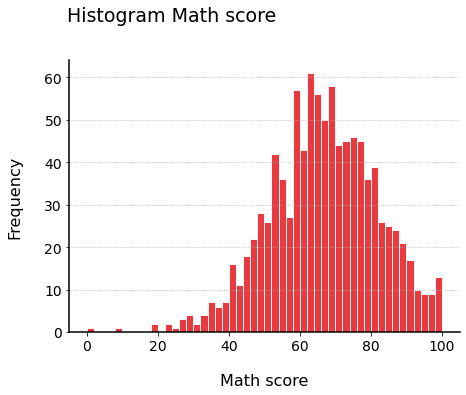

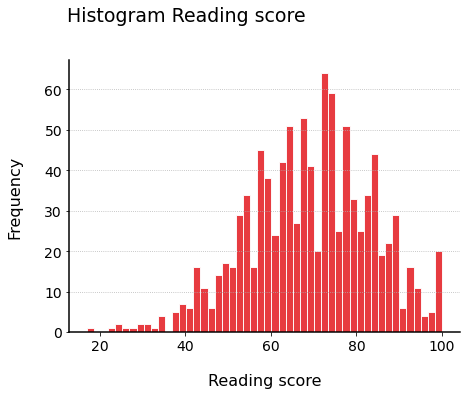

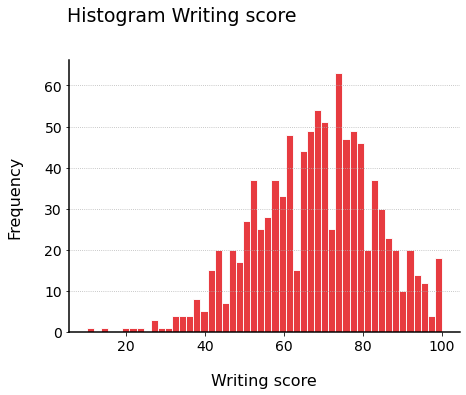

In [79]:
for column in df.select_dtypes(exclude='category').columns:
  histograma_numericas(df,column)
  print('\n\n\n')

**¿Como se distribuyen los puntajes por área teniendo en cuenta el genero de los estudiantes?**

In [13]:
 
def grafico_bivariado(df,var_numerica,categoria1):
  # Argumentos de estilo de la caja del boxplot
  PROPS = {'boxprops':{'edgecolor':'black'}, 'medianprops':{'color':'black'},'whiskerprops':{'color':'black'},'capprops':{'color':'black'}}

  # Generando la figura
  fig, ax = plt.subplots(figsize=(7,5))
  # Configurando Titulos 
  plt.suptitle(f'Distribution {var_numerica}',fontsize=18,x=0.13,y=1.03,ha='left',weight='bold')  # Suptitulo
  plt.title(f'Categorized by {categoria1}',fontsize=12,ha='left',x=0.01,y=1.06) # Titulo  

  # Dibujando el boxplot
  sns.boxplot(data=df,x=var_numerica,y=categoria1,ax=ax,palette={'female':'#f2f0f0','male':'#e5252b'},**PROPS)

  
  ax.set_ylabel(categoria1.capitalize(),fontsize=16)
  ax.yaxis.set_label_coords(-.22, .5)
  ax.set_xlabel(var_numerica.capitalize(),fontsize=16)
  ax.xaxis.set_label_coords(.5, -.15)
  plt.yticks(ticks=[0,1],labels=['Female','Male'],fontsize=14)
  plt.xticks(fontsize=14)

  #configurando limites de la grafica y quitando los bordes
  plt.xlim(0,115)
  for i in ['bottom','left','top','right']:
    plt.gca().spines[i].set_linewidth(0)
    plt.grid(axis='x',linestyle='dotted') # Grilla verticales de fondo

  plt.show()

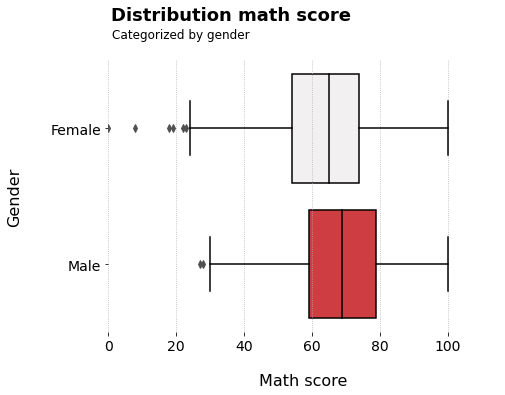

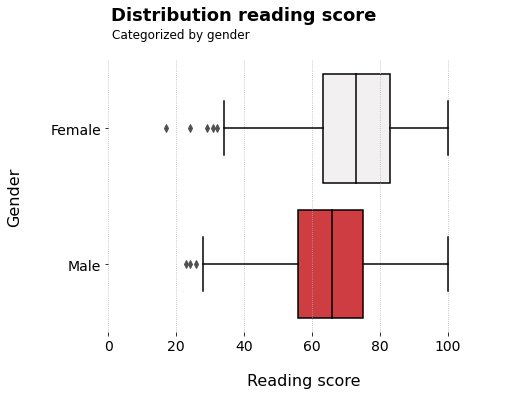

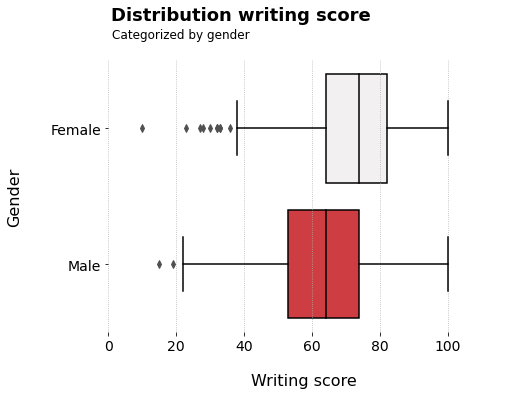

In [14]:
for column in df.select_dtypes(exclude='category').columns:
  grafico_bivariado(df,column,'gender',)
  print('\n\n\n')

**¿Como se distribuyen los puntajes por área teniendo en cuenta el genero y la etnia de los estudiantes?**

In [15]:

def grafico_multivariado(df,var_numerica,categoria1,categoria2):
  # Argumentos de estilo de la caja del boxplot
  PROPS = {'boxprops':{'edgecolor':'black'}, 'medianprops':{'color':'black'},'whiskerprops':{'color':'black'},'capprops':{'color':'black'}}

  # generando la figura
  fig, ax = plt.subplots(figsize=(7,5))

  # Configurando Titulos 
  plt.suptitle(f'Distribution {var_numerica}',fontsize=18,x=0.13,y=1.03,ha='left',weight='bold')  # Suptitulo
  plt.title(f'Categorized by {categoria1} and {categoria2}',fontsize=12,ha='left',x=0.01,y=1.06) # Titulo  

  # Dibujando el Boxplot 
  sns.boxplot(data=df,x=var_numerica,y=categoria1,color='#e5252b',hue=categoria2,**PROPS,ax=ax)

  # configurando Ejes
  ax.set_ylabel(categoria1.capitalize(),fontsize=16)
  ax.yaxis.set_label_coords(-.2, .5)
  plt.yticks(ticks=[0,1,2,3,4],fontsize=12,labels=['Group ' + i for i in ['A','B','C','D','E']])
  ax.set_xlabel(var_numerica.capitalize(),fontsize=16)
  ax.xaxis.set_label_coords(.5, -.15)
  plt.xticks(fontsize=14)

  #configurando limites de la grafica y quitando los bordes
  plt.xlim(0,110)
  for i in ['bottom','left','top','right']:
    plt.gca().spines[i].set_linewidth(0)
    plt.grid(axis='x',linestyle='dotted') # Grilla verticales de fondo

  plt.legend(title=categoria2.capitalize())
  plt.show()

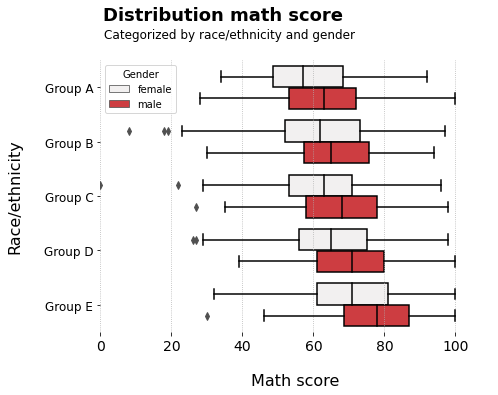

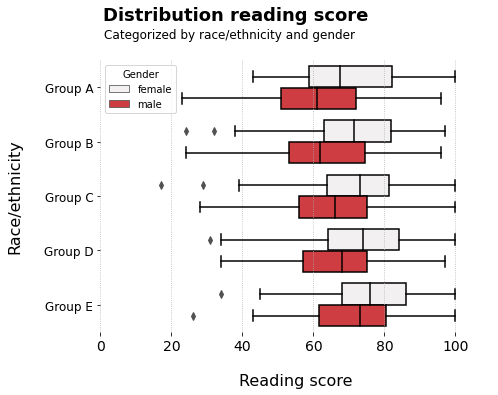

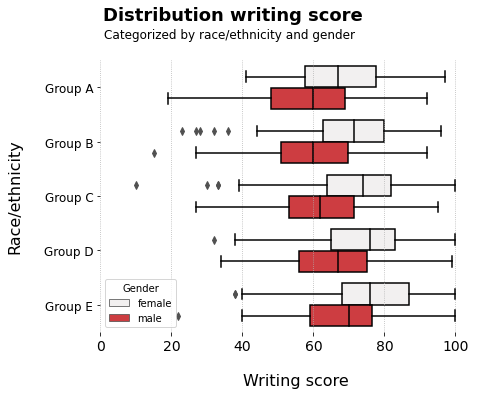

In [16]:
for column in df.select_dtypes(exclude='category').columns:
  grafico_multivariado(df,column,'race/ethnicity','gender')
  print('\n\n\n')

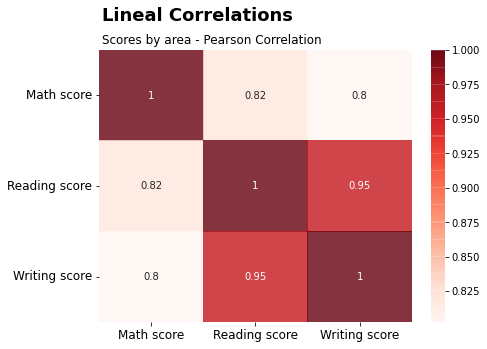

In [125]:
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(df.select_dtypes(exclude='category').corr(),cmap='Reds',alpha=0.8,annot=True)
plt.suptitle(f'Lineal Correlations',fontsize=18,x=0.13,y=1.0,ha='left',weight='bold')  # Suptitulo
plt.title(f'Scores by area - Pearson Correlation',fontsize=12,ha='left',x=0.01,y=1.2) # Titulo  
plt.xticks(ticks=[0.5,1.5,2.5],labels=[i.capitalize() for i in df.select_dtypes(exclude='category').columns],fontsize=12)
plt.yticks(ticks=[0.5,1.5,2.5],labels=[i.capitalize() for i in df.select_dtypes(exclude='category').columns],fontsize=12,rotation=0)
plt.show()

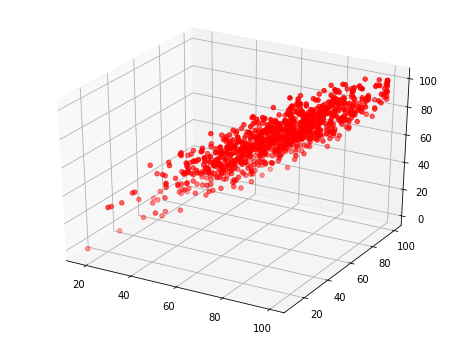

In [127]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(projection='3d')

zs = df['math score']
xs = df['reading score']
ys = df['writing score']

ax.scatter(xs, ys, zs,color='red')